In [1]:
import logging

logging.basicConfig(
    level=logging.INFO, 
    style="{", 
    format="{levelname}:{module}.{funcName}:{lineno}:{message}"
)

In [12]:
import os
import matplotlib.pyplot as plt
import ausweather

In [13]:
%matplotlib inline
plt.rcParams["figure.dpi"] = 120

In [14]:
db = ausweather.Database('test.sqlite')

In [15]:
df = db.fetch_bom_station_lists([139])

INFO:bom.fetch_bom_station_list:43:Fetching BoM station list for AUS obsCode 139


Now note that it will not download these lists again:

In [16]:
df = db.fetch_bom_station_lists()

INFO:database.fetch_bom_station_lists:49:ncc_obs_codes="auto" -> still missing: [136, 122]
INFO:bom.fetch_bom_station_list:43:Fetching BoM station list for AUS obsCode 136
INFO:bom.fetch_bom_station_list:43:Fetching BoM station list for AUS obsCode 122


In [17]:
df.head()

,Site,Name,Lat,Lon,Start,End,Years,%,AWS,ncc_obs_code,ncc_obs_descr
0,41497,AAC DALBY CAMPUS,-27.1494,151.2894,Aug 1985,Sep 2012,26.8,98,N,139,Monthly total rainfall
1,33259,ABBOT POINT BULKCOAL,-19.8833,148.0750,Jan 1991,Jun 1991,0.5,100,N,139,Monthly total rainfall
2,67114,ABBOTSBURY (FAIRFIELD (CITY FARM)),-33.8667,150.8611,Dec 2000,Mar 2020,18.9,98,N,139,Monthly total rainfall
3,40000,ABBOTSFORD,-27.9500,153.1000,Oct 1909,Jul 1974,64.4,99,N,139,Monthly total rainfall
4,86307,ABBOTSFORD,-37.8000,145.0000,May 1972,Sep 1972,0.4,99,N,139,Monthly total rainfall


Let's plot rainfall stations locations

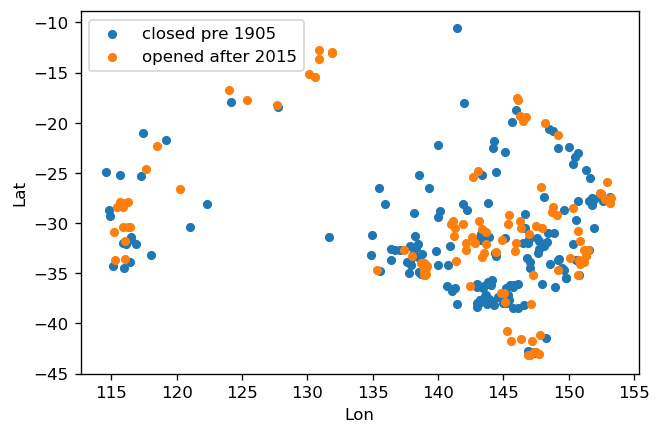

In [33]:
fig, ax = plt.subplots()

old = (df.End.str[-4:].astype(int) <= 1905) & (df.ncc_obs_code == 139)
new = (df.Start.str[-4:].astype(int) >= 2015) & (df.ncc_obs_code == 139)

df[old].plot.scatter(x='Lon', y='Lat', label='closed pre 1905', color="tab:blue", ax=ax)
df[new].plot.scatter(x='Lon', y='Lat', label='opened after 2015', color="tab:orange", ax=ax)

In [19]:
db.close()
os.remove(db.filename)